In [168]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from math import sqrt

In [169]:
df = pd.read_csv('pokemon.csv')

In [170]:
df['Type 1'] = df['Type 1'].fillna(value = 'None')
df['Type 2'] = df['Type 2'].fillna(value = 'None')
df.dropna(inplace = True)
df = df.rename(columns={'Pokemon Id':'pokemon_id', 'Type 1':'type_1', 
                        'Type 2':'type_2', 'Sp. Atk':'sp_atk',
                        'Sp. Def':'sp_def'})

___

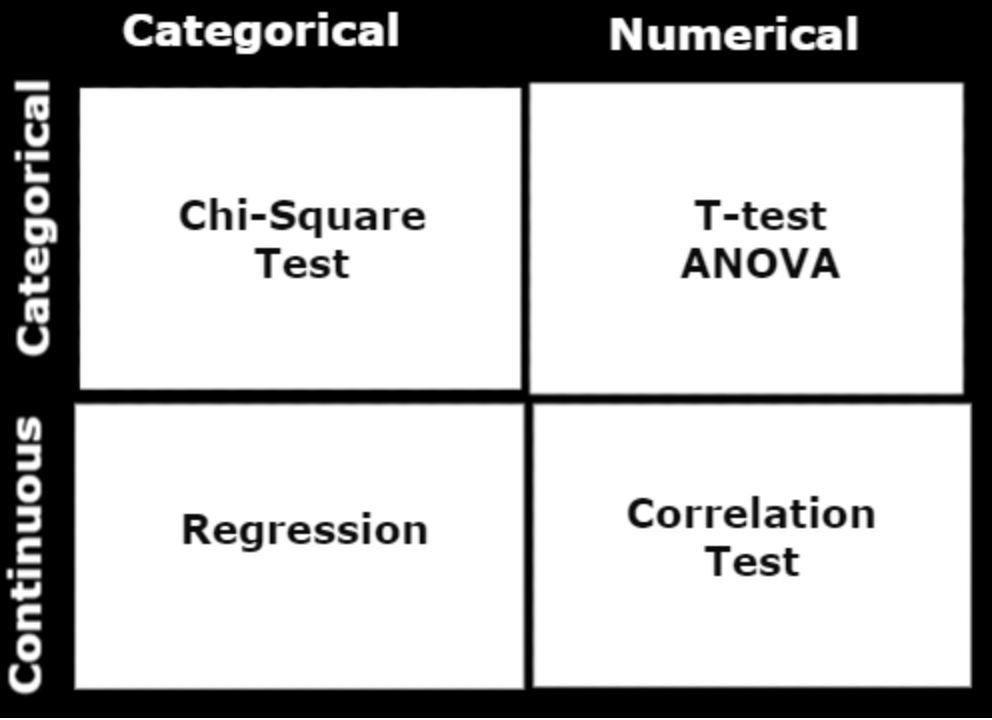

___

___
## Chi Square Testing
- experiment is trying to draw a comparison or find the difference between the two categorical random variables, then you can use the chi-square test, to test the statistical difference.

In [171]:
def chi_2(df, cat_1, cat_2):
    '''performs a chi2 test by taking in a df, and 2 features'''
    null_hypo = f'{cat_1} & {cat_2} are independent from each other.'
    alt_hypo = f'{cat_1} & {cat_2} are dependent from one another.'
    # set alpha
    alpha = 0.05
    observed = pd.crosstab(df[cat_1], df[cat_2], margins = True)
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    if p < alpha:
        print(f'Reject null hypothesis')
        print(f'There is evidence to suggest {cat_1} and {cat_2} are dependent on one another.')
    else:
        print(f'Fail to reject the null hypothesis.')
        print(f'There is not sufficient evidence to reject independence of {cat_1} and {cat_2}.')
        print(f'Move forward with althernative hypothesis: \n{alt_hypo}')

In [172]:
chi_2(df, 'type_1', 'type_2')

Reject null hypothesis
There is evidence to suggest type_1 and type_2 are dependent on one another.


___

## Anova Testing
- When your experiment is trying to draw a comparison or find the difference between one categorical (with more than two categories) and another continuous variable, then you use the ANOVA (Analysis of Variance) test.

In [173]:
df.Generation.value_counts()

1.0    166
5.0    165
3.0    160
4.0    121
2.0    106
6.0     81
Name: Generation, dtype: int64

In [174]:
def anova_test(df, cat, cont):
    '''performs an ANOVA test based on df and a continnuous & categorical feature'''
    null_hypo = f'There is no difference in between each {cat} and the {cont}'
    alt_hypo = f'There is a difference between at least 2 of the {cat}\'s and the {cont}'
    alpha = 0.05
    f, p = stats.f_oneway(
        df[cont][df[cat]==1.0],
        df[cont][df[cat]==2.0],
        df[cont][df[cat]==3.0],
        df[cont][df[cat]==4.0],
        df[cont][df[cat]==5.0],
        df[cont][df[cat]==6.0])
    if p > alpha:
        print('Failed to reject the null hypothesis!')
        print(f'No significant difference in the means between the {cat}.')
    else:
        print(f'There\'s evidence to suggest at least 2 of these {cont}\'s have different means for {cat}.')

In [175]:
anova_test(df, 'Speed', 'Generation')

There's evidence to suggest at least 2 of these Generation's have different means for Speed.


/usr/local/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


___ 
## Pearson R
- Checks for correlation between 2 different continuous variables
- measure the degree of relationships between two linearly related variables.

In [176]:
def pearson_r(df, cont_1, cont_2):
    '''Runs a pearson r coefficient statistical test to find correlation'''
    null_hypo = f'There is no correlation between {cont_1} and {cont_2}.'
    alt_hypo = f'There is correlation between {cont_1} and {cont_2}.'
    corr, p = stats.pearsonr(df[cont_1], df[cont_2])
    alpha = 0.05
    if p > alpha:
        return print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypo)
    else:
        return print("We reject the null hypothesis that", null_hypo)

In [177]:
pearson_r(df, 'Speed', 'Attack')

We reject the null hypothesis that There is no correlation between Speed and Attack.


___
# ALL T-TESTS

___
## One sample one tailed t-test
- One Tailed checks if one mean is greater than or less than the other
- To test if the means are higher, we evaluate (p/2) < a and t > 0 (to test if higher)
- For checking if less-than, we do (p/2) < a and  t < 0
- One Sample t-test compares the mean of a subgroup to the mean of a population
    - One sample example is Sunday tips vs. the rest of the week tips

In [178]:
def one_sample_one_tail_ttest_greater(df, cat, cont, value_1, value_2):
    '''This function takes in the data set and runs a one tailed t-test.
    one sample one tailed ttests:
        one sample:
            - compares the mean of a subgroup to the mean of a population
        one tailed:
            - checks if one mean is greater than or less than the other'''
    null_hypo = f'There is no difference in the mean of {cont} with {cat} = {value_1} and {cat} = {value_2}.'
    alt_hypo = f'The average {cont} where {cat} = {value_1} is greater than {cat} = {value_2}'
    # set alpha
    alpha = .05
    # set the value for comparison
    value_1 = df[df[cat] == value_1]
    value_2 = df[df[cat] == value_2]
    # make the needed values
    μ = df[cont].mean()
    xbar = df[cont].mean()
    s = df[cont].std()
    n = df.shape[0]
    degf = n - 1
    standard_error = s / sqrt(n)
    t = (xbar - μ) / (s / sqrt(n))
    p = stats.t(degf).sf(t)
    if (p/2) < alpha and t > 0:
        print(f'Reject the null hypothesis that: \n {null_hypo}')
        print(alt_hypo)
    else:
        print(null_hypo)

In [179]:
one_sample_one_tail_ttest_greater(df, 'type_1', 'Speed', 'Grass', 'Fire')

There is no difference in the mean of Speed with type_1 = Grass and type_1 = Fire.


In [180]:
def one_sample_one_tail_ttest_lesser(df, cat, cont, value):
    '''This function takes in the data set and runs a one tailed t-test.
    one sample one tailed ttests:
        one sample:
            - compares the mean of a subgroup to the mean of a population
        one tailed:
            - checks if one mean is greater than or less than the other'''
    null_hypo = f'There is no difference in the mean of {cont} with {cat} = {value} and {cat} != {value}.'
    alt_hypo = f'The average {cont} where {cat} = {value} is greater than {cat} != {value}'
    # set alpha
    alpha = .05
    # set the value for comparison
    value = df[df[cat] == value]
    population = df[df[cat] != value]
    # make the needed values
    μ = df[cont].mean()
    xbar = df[cont].mean()
    s = df[cont].std()
    n = df.shape[0]
    degf = n - 1
    standard_error = s / sqrt(n)
    t = (xbar - μ) / (s / sqrt(n))
    p = stats.t(degf).sf(t)
    if (p/2) < alpha and t < 0:
        print(f'Reject the null hypothesis that: \n {null_hypo}')
        print(alt_hypo)
    else:
        print(null_hypo)

In [181]:
one_sample_one_tail_ttest_lesser(df, 'type_1', 'Speed', 'Grass')

There is no difference in the mean of Speed with type_1 = Grass and type_1 != Grass.


___
## One sample two tailed t-test
- A two-tailed t-test is measuring for any difference, regardless of direction (means of one group higher or lower)
- The two-tailed t-test is checking if the means of two groups are different
- One Sample t-test compares the mean of a subgroup to the mean of a population
    - One sample example is Sunday tips vs. the rest of the week tips

In [182]:
def one_sample_two_tail_ttest(df, cat, cont, value):
    '''This function takes in the data set and runs a one sample two tailed ttest:
        one sample:
            - compares the mean of a subgroup to the mean of a population
        two tailed:
            - measuring for any difference, regardless of direction'''
    null_hypo = f'There is no difference in the mean of {cont} between {cat} = {value} and {cat} != {value}.'
    alt_hypo = f'There is a significant difference between the average {cont} between {cat} = {value} and {cat} != {value}'
    # set alpha
    alpha = .05
    # set the value for comparison
    value = df[df[cat] == value]
    population = df[df[cat] != value]
    # make the needed values
    μ = df[cont].mean()
    xbar = df[cont].mean()
    s = df[cont].std()
    n = df.shape[0]
    degf = n - 1
    standard_error = s / sqrt(n)
    t = (xbar - μ) / (s / sqrt(n))
    p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test
    if p < alpha:
        print(f'Reject the null hypothesis that: \n {null_hypo}')
        print(alt_hypo)
    else:
        print(null_hypo)

In [183]:
one_sample_two_tail_ttest(df, 'type_1', 'Speed', 'Grass')

There is no difference in the mean of Speed between type_1 = Grass and type_1 != Grass.


___
## Two sample two tailed t-test
- A two-tailed t-test is measuring for any difference, regardless of direction (means of one group higher or lower)
- The two-tailed t-test is checking if the means of two groups are different
- The two sample t-test compares the means of two subgroups
    - A two-sample t-test would be comparing average tips between smokers vs. nonsmokers

In [184]:
def two_sample_two_tail_ttest(df, cat, cont, value_1, value_2):
    '''This function takes in the data set and runs a one tailed t-test.
    one sample one tailed ttests:
        two sample:
            - compares the means of two subgroups
        two tailed:
            - measuring for any difference, regardless of direction'''
    null_hypo = f'There is no difference in the mean of average {cont} between {cat} = {value_1} and {cat} = {value_2}.'
    alt_hypo = f'There is a significant difference between the average {cont} between {cat} = {value_1} and {cat} = {value_2}'
    # set alpha
    alpha = .05
    # set the value for comparison
    value_1 = df[df[cat] == value_1]
    value_2 = df[df[cat] == value_2]
    # make the needed values
    μ = df[cont].mean()
    xbar = df[cont].mean()
    s = df[cont].std()
    n = df.shape[0]
    degf = n - 1
    standard_error = s / sqrt(n)
    t = (xbar - μ) / (s / sqrt(n))
    p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test
    if p < alpha:
        print(f'Reject the null hypothesis that: \n {null_hypo}')
        print(alt_hypo)
    else:
        print(null_hypo)

In [185]:
two_sample_two_tail_ttest(df, 'type_1', 'Speed', 'Grass', 'Fire')

There is no difference in the mean of average Speed between type_1 = Grass and type_1 = Fire.


___
## Two sample one tailed t-test
- One Tailed checks if one mean is greater than or less than the other
- To test if the means are higher, we evaluate (p/2) < a and t > 0 (to test if higher)
- For checking if less-than, we do (p/2) < a and  t < 0
- The two sample t-test compares the means of two subgroups
    - A two-sample t-test would be comparing average tips between smokers vs. nonsmokers

In [186]:
def two_sample_one_tail_ttest_greater(df, cat, cont, value_1, value_2):
    '''This function takes in the data set and runs a one tailed t-test.
    one sample one tailed ttests:
        two sample:
            - compares the means of two subgroups
        one tailed:
            - checks if one mean is greater than or less than the other'''
    null_hypo = f'There is no difference in the mean of {cont} with {cat} = {value_1} and {cat} = {value_2}.'
    alt_hypo = f'The average {cont} where {cat} = {value_1} is greater than {cat} = {value_2}'
    # set alpha
    alpha = .05
    # set the value for comparison
    value_1 = df[df[cat] == value_1]
    value_2 = df[df[cat] == value_2]
    # make the needed values
    μ = df[cont].mean()
    xbar = df[cont].mean()
    s = df[cont].std()
    n = df.shape[0]
    degf = n - 1
    standard_error = s / sqrt(n)
    t = (xbar - μ) / (s / sqrt(n))
    p = stats.t(degf).sf(t)
    if (p/2) < alpha and t > 0:
        print(f'Reject the null hypothesis that: \n {null_hypo}')
        print(alt_hypo)
    else:
        print(null_hypo)

In [187]:
two_sample_one_tail_ttest_greater(df, 'type_1', 'Speed', 'Grass', 'Fire')

There is no difference in the mean of Speed with type_1 = Grass and type_1 = Fire.


In [188]:
def two_sample_one_tail_ttest_lesser(df, cat, cont, value_1, value_2):
    '''This function takes in the data set and runs a one tailed t-test.
    one sample one tailed ttests:
        two sample:
            - compares the means of two subgroups
        one tailed:
            - checks if one mean is greater than or less than the other'''
    null_hypo = f'There is no difference in the mean of {cont} with {cat} = {value_1} and {cat} = {value_2}.'
    alt_hypo = f'The average {cont} where {cat} = {value_1} is greater than {cat} = {value_2}'
    # set alpha
    alpha = .05
    # set the value for comparison
    value_1 = df[df[cat] == value_1]
    value_2 = df[df[cat] == value_2]
    # make the needed values
    μ = df[cont].mean()
    xbar = df[cont].mean()
    s = df[cont].std()
    n = df.shape[0]
    degf = n - 1
    standard_error = s / sqrt(n)
    t = (xbar - μ) / (s / sqrt(n))
    p = stats.t(degf).sf(t)
    if (p/2) < alpha and t < 0:
        print(f'Reject the null hypothesis that: \n {null_hypo}')
        print(alt_hypo)
    else:
        print(null_hypo)

In [189]:
two_sample_one_tail_ttest_lesser(df, 'type_1', 'Speed', 'Grass', 'Fire')

There is no difference in the mean of Speed with type_1 = Grass and type_1 = Fire.
